# Goal
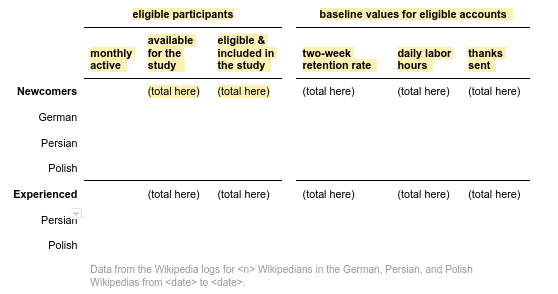

1. monthly-active - get from stats.wikimedia, do some subtraction of newcomers.
2. active users - active last 90 and have minimum 4 edits (before ores) - get from candidates table
3. meet quality standards* - get from candidates table
4. two-week-rention of control
5. daily lab



In [1]:
import os
# import civilservant
import pandas as pd

In [2]:
# cant get this working at the moment
# since its just static i will do it in sql and copy paste
# from civilservant import db
# db_engine = db.init_engine()
# print(db_engine) 
# db_engine.execute('show databases;').fetchall()
#db_engine.execute('select count(*) from candidates;').fetchall()

In [3]:
l_arrays = [['Newcomer', 'Newcomer', 'Newcomer', 'Newcomer', 'Experienced', 'Experienced', 'Experienced'], 
            ['table.1.index.2', 'table.1.index.3', 'table.1.index.7', 'table.1.index.1', 'table.1.index.6', 'table.1.index.7', 'table.1.index.5']]
mi = pd.MultiIndex.from_arrays(l_arrays, names=('Experience level', 'Language'))

In [4]:
mau = pd.DataFrame([[12281],[8555],[2414], [12281+8555+2414] ,[1899],[1985], [1899+1985]], index=mi, columns=['table.1.subtitle.left.1'])

In [5]:
# select lang, user_experience_level='bin_0', count(*) from candidates where lang != 'en' group by lang, user_experience_level='bin_0' order by user_experience_level='bin_0' desc;

# lang,user_experience_level='bin_0',count(*)
# ar,1,5936
# de,1,10476
# pl,1,2756
# fa,0,4648
# pl,0,8189

edit_qualifying_array = [
    [5936],
    [10476],
    [2756],
    [5936+10476+2756],
    [4648],
    [8189],
        [4648+8189],
]

edit_qualifying = pd.DataFrame(data=edit_qualifying_array,
                               index=mi,
                               columns=['table.1.subtitle.left.2']
                              )

In [6]:
# select lang, user_experience_level='bin_0', count(*) from candidates
# where lang != 'en' and user_editcount_quality>=4
# group by lang, user_experience_level='bin_0' order by user_experience_level='bin_0' desc, lang;

# lang,user_experience_level='bin_0',count(*)
# ar,1,3142
# de,1,5834
# pl,1,1653
# fa,0,2537
# pl,0,3384

quality_qualifying_array = [
    [3142],
    [5834],
    [1653],
    [3142+5834+1653],
    [2537],
    [3384],
    [2537+3384],
]

quality_qualifying = pd.DataFrame(data=quality_qualifying_array,
                               index=mi,
                               columns=['table.1.subtitle.left.3']
                              )

In [7]:
perc_treatment_thanked_array = [
    [0.13],
    [0.48],
    [0.14],
    [0.31],
    [0.06],
    [0.72],
    [0.43],
]

perc_treatment_thanked = pd.DataFrame(data=perc_treatment_thanked_array,
                               index=mi,
                               columns=['table.1.subtitle.left.4']
                              )

In [13]:
datadir = os.getenv('TRESORDIR')
tresorpath = 'CivilServant/projects/wikipedia-integration/gratitude-study/Data Drills/thankee/post_experiment_analysis'
fname = 'grat-thankee-all-pre-post-treatment-vars-max-cols.csv'
fpath = os.path.join(datadir, tresorpath, fname)

all_partici = pd.read_csv(fpath)

deleted_cond = all_partici['thanks.not.received.user.deleted']==True
multi_cond = all_partici['received.multiple.thanks']==True
unobservable_blocks = all_partici[(deleted_cond) | (multi_cond)]['randomization.block.id']

partici = all_partici[all_partici['randomization.block.id'].apply(lambda b: b not in unobservable_blocks)]

In [61]:
t_f = os.path.join(datadir, 'CivilServant/projects/wikipedia-integration/gratitude-study/datasets/debrief-translations/l10ns_thanker_thankee_all.csv')
translations = pd.read_csv(t_f, index_col='key')

In [10]:
f'Len all participatns {len(all_partici)}, observable only {len(partici)}'

'Len all participatns 15558, observable only 15410'

In [11]:
control = partici[partici['randomization.arm']==0]

In [12]:
assert len(control)*2 == len(partici)

In [13]:
full_lang_names = {'ar':'table.1.index.2', 'de': 'table.1.index.3', 'pl': 'table.1.index.7', 'fa': 'table.1.index.6'}
control['Language'] = control['lang'].apply(lambda l: full_lang_names[l])
control['Experience level'] = control['prev.experience.assignment'].apply(lambda b: 'Newcomer' if b=='bin_0' else 'Experienced')
control_aggs = control.groupby(['Experience level', 'Language',]).agg({'two.week.retention':pd.np.mean, 
                                                                       'labor.hours.per.day.pre.treatment':pd.np.mean,
#                                                                  'labor.hours.per.day.post.treatment':pd.np.mean,
                                                                 'labor.hours.per.day.diff':pd.np.mean,
                                                                 'thanks.sent':pd.np.mean})
control_all_aggs = control.groupby(['Experience level',]).agg({'two.week.retention':pd.np.mean, 
                                                               'labor.hours.per.day.pre.treatment':pd.np.mean,
#                                                                  'labor.hours.per.day.post.treatment':pd.np.mean,
                                                                 'labor.hours.per.day.diff':pd.np.mean,  
                                                                 'thanks.sent':pd.np.mean})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
control_aggs = control_aggs.rename(columns={'labor.hours.per.day.pre.treatment':"table.1.subtitle.right.2",
#                              'labor.hours.per.day.post.treatment':"daily labor hours, post-treatment",
                             'labor.hours.per.day.diff':"table.1.subtitle.right.3",
                             'two.week.retention':"table.1.subtitle.right.1", 
                             'thanks.sent':"table.1.subtitle.right.4"}, )
control_all_aggs = control_all_aggs.rename(columns={'labor.hours.per.day.pre.treatment':"table.1.subtitle.right.2",
#                              'labor.hours.per.day.post.treatment':"daily labor hours, post-treatment",
                             'labor.hours.per.day.diff':"table.1.subtitle.right.3",
                             'two.week.retention':"table.1.subtitle.right.1", 
                             'thanks.sent':"table.1.subtitle.right.4"}, )

In [15]:
c_arrays = [
['table.1.title.right']*len(control_aggs.columns),
    control_aggs.columns.values
]
control_aggs_cols = pd.MultiIndex.from_arrays(c_arrays)

In [16]:
control_aggs.columns = control_aggs_cols
control_all_aggs.columns = control_aggs_cols

In [17]:
eligible_participants = pd.concat([mau, edit_qualifying, quality_qualifying, perc_treatment_thanked], axis=1)
cc_arrays = [
    ['table.1.title.left']*len(eligible_participants.columns),
    eligible_participants.columns.values
]
eligible_participants_cols = pd.MultiIndex.from_arrays(cc_arrays)
eligible_participants.columns = eligible_participants_cols

In [18]:
eligible_participants

table.1.title.left  \
                                 table.1.subtitle.left.1   
Experience level Language                                  
Newcomer         table.1.index.2                   12281   
                 table.1.index.3                    8555   
                 table.1.index.7                    2414   
                 table.1.index.1                   23250   
Experienced      table.1.index.6                    1899   
                 table.1.index.7                    1985   
                 table.1.index.5                    3884   

                                                          \
                                 table.1.subtitle.left.2   
Experience level Language                                  
Newcomer         table.1.index.2                    5936   
                 table.1.index.3                   10476   
                 table.1.index.7                    2756   
                 table.1.index.1                   19168   
Experienced      table.1.index.6                    4648   
                 table.1.index.7                    8189   
                 table.1.index.5                   12837   

                                                          \
                                 table.1.subtitle.left.3   
Experience level Language                                  
Newcomer         table.1.index.2                    3142   
                 table.1.index.3                    5834   
                 table.1.index.7                    1653   
                 table.1.index.1                   10629   
Experienced      table.1.index.6                    2537   
                 table.1.index.7                    3384   
                 table.1.index.5                    5921   

                                                          
                                 table.1.subtitle.left.4  
Experience level Language                                 
Newcomer         table.1.index.2                    0.13  
                 table.1.index.3                    0.48  
                 table.1.index.7                    0.14  
                 table.1.index.1                    0.31  
Experienced      table.1.index.6                    0.06  
                 table.1.index.7                    0.72  
                 table.1.index.5                    0.43

In [19]:
control_aggs

table.1.title.right  \
                                 table.1.subtitle.right.1   
Experience level Language                                   
Experienced      table.1.index.6                 0.307309   
                 table.1.index.7                 0.442308   
Newcomer         table.1.index.2                 0.110020   
                 table.1.index.3                 0.181785   
                 table.1.index.7                 0.194614   

                                                           \
                                 table.1.subtitle.right.2   
Experience level Language                                   
Experienced      table.1.index.6                 0.028206   
                 table.1.index.7                 0.060861   
Newcomer         table.1.index.2                 0.020430   
                 table.1.index.3                 0.023823   
                 table.1.index.7                 0.026869   

                                                           \
                                 table.1.subtitle.right.3   
Experience level Language                                   
Experienced      table.1.index.6                 0.007280   
                 table.1.index.7                -0.004368   
Newcomer         table.1.index.2                -0.010108   
                 table.1.index.3                -0.011400   
                 table.1.index.7                -0.015002   

                                                           
                                 table.1.subtitle.right.4  
Experience level Language                                  
Experienced      table.1.index.6                 0.264120  
                 table.1.index.7                 0.348901  
Newcomer         table.1.index.2                 0.032089  
                 table.1.index.3                 0.051833  
                 table.1.index.7                 0.037944

In [20]:
control_all_aggs

table.1.title.right                           \
                 table.1.subtitle.right.1 table.1.subtitle.right.2   
Experience level                                                     
Experienced                      0.381203                 0.046080   
Newcomer                         0.162141                 0.023289   

                                                                    
                 table.1.subtitle.right.3 table.1.subtitle.right.4  
Experience level                                                    
Experienced                      0.000904                 0.310526  
Newcomer                        -0.011592                 0.043608

In [21]:
c_a_arrays = [control_all_aggs.index.values, ['table.1.index.5', 'table.1.index.1',] ]
control_all_aggs.index = pd.MultiIndex.from_arrays(c_a_arrays)

In [22]:
control_all_aggs

table.1.title.right                           \
                            table.1.subtitle.right.1 table.1.subtitle.right.2   
Experienced table.1.index.5                 0.381203                 0.046080   
Newcomer    table.1.index.1                 0.162141                 0.023289   

                                                                               
                            table.1.subtitle.right.3 table.1.subtitle.right.4  
Experienced table.1.index.5                 0.000904                 0.310526  
Newcomer    table.1.index.1                -0.011592                 0.043608

In [23]:
caggs = pd.concat([control_all_aggs, control_aggs])

In [24]:
caggs

table.1.title.right                           \
                            table.1.subtitle.right.1 table.1.subtitle.right.2   
Experienced table.1.index.5                 0.381203                 0.046080   
Newcomer    table.1.index.1                 0.162141                 0.023289   
Experienced table.1.index.6                 0.307309                 0.028206   
            table.1.index.7                 0.442308                 0.060861   
Newcomer    table.1.index.2                 0.110020                 0.020430   
            table.1.index.3                 0.181785                 0.023823   
            table.1.index.7                 0.194614                 0.026869   

                                                                               
                            table.1.subtitle.right.3 table.1.subtitle.right.4  
Experienced table.1.index.5                 0.000904                 0.310526  
Newcomer    table.1.index.1                -0.011592                 0.043608  
Experienced table.1.index.6                 0.007280                 0.264120  
            table.1.index.7                -0.004368                 0.348901  
Newcomer    table.1.index.2                -0.010108                 0.032089  
            table.1.index.3                -0.011400                 0.051833  
            table.1.index.7                -0.015002                 0.037944

In [25]:
eligible_participants

table.1.title.left  \
                                 table.1.subtitle.left.1   
Experience level Language                                  
Newcomer         table.1.index.2                   12281   
                 table.1.index.3                    8555   
                 table.1.index.7                    2414   
                 table.1.index.1                   23250   
Experienced      table.1.index.6                    1899   
                 table.1.index.7                    1985   
                 table.1.index.5                    3884   

                                                          \
                                 table.1.subtitle.left.2   
Experience level Language                                  
Newcomer         table.1.index.2                    5936   
                 table.1.index.3                   10476   
                 table.1.index.7                    2756   
                 table.1.index.1                   19168   
Experienced      table.1.index.6                    4648   
                 table.1.index.7                    8189   
                 table.1.index.5                   12837   

                                                          \
                                 table.1.subtitle.left.3   
Experience level Language                                  
Newcomer         table.1.index.2                    3142   
                 table.1.index.3                    5834   
                 table.1.index.7                    1653   
                 table.1.index.1                   10629   
Experienced      table.1.index.6                    2537   
                 table.1.index.7                    3384   
                 table.1.index.5                    5921   

                                                          
                                 table.1.subtitle.left.4  
Experience level Language                                 
Newcomer         table.1.index.2                    0.13  
                 table.1.index.3                    0.48  
                 table.1.index.7                    0.14  
                 table.1.index.1                    0.31  
Experienced      table.1.index.6                    0.06  
                 table.1.index.7                    0.72  
                 table.1.index.5                    0.43

In [26]:
# eligible_participants

In [27]:
table1 = pd.concat([eligible_participants, caggs], axis=1)

In [28]:
table1 = table1.sort_index(level=0,ascending=False, sort_remaining=True)

In [29]:
table1[('table.1.title.left','table.1.subtitle.left.4')] = table1[('table.1.title.left','table.1.subtitle.left.4')].apply(lambda x: "{0:.0%}".format(x))
table1[('table.1.title.right','table.1.subtitle.right.1')] = table1[('table.1.title.right','table.1.subtitle.right.1')].apply(lambda x: "{0:.0%}".format(x))

In [30]:
table1

table.1.title.left                          \
                            table.1.subtitle.left.1 table.1.subtitle.left.2   
Newcomer    table.1.index.7                    2414                    2756   
            table.1.index.3                    8555                   10476   
            table.1.index.2                   12281                    5936   
            table.1.index.1                   23250                   19168   
Experienced table.1.index.7                    1985                    8189   
            table.1.index.6                    1899                    4648   
            table.1.index.5                    3884                   12837   

                                                                             \
                            table.1.subtitle.left.3 table.1.subtitle.left.4   
Newcomer    table.1.index.7                    1653                     14%   
            table.1.index.3                    5834                     48%   
            table.1.index.2                    3142                     13%   
            table.1.index.1                   10629                     31%   
Experienced table.1.index.7                    3384                     72%   
            table.1.index.6                    2537                      6%   
            table.1.index.5                    5921                     43%   

                                 table.1.title.right                           \
                            table.1.subtitle.right.1 table.1.subtitle.right.2   
Newcomer    table.1.index.7                      19%                 0.026869   
            table.1.index.3                      18%                 0.023823   
            table.1.index.2                      11%                 0.020430   
            table.1.index.1                      16%                 0.023289   
Experienced table.1.index.7                      44%                 0.060861   
            table.1.index.6                      31%                 0.028206   
            table.1.index.5                      38%                 0.046080   

                                                                               
                            table.1.subtitle.right.3 table.1.subtitle.right.4  
Newcomer    table.1.index.7                -0.015002                 0.037944  
            table.1.index.3                -0.011400                 0.051833  
            table.1.index.2                -0.010108                 0.032089  
            table.1.index.1                -0.011592                 0.043608  
Experienced table.1.index.7                -0.004368                 0.348901  
            table.1.index.6                 0.007280                 0.264120  
            table.1.index.5                 0.000904                 0.310526

In [31]:
def make_blog_html(lang):
    translation_dict = translations[lang].to_dict()
    print(translation_dict)
#     translation_dict['Newcomer']='' #no string, but keep the spacing
#     translation_dict['Experienced']='' #no string but keep the spacing
    table1_lang = table1.rename(translation_dict, axis=1).rename(translation_dict, axis=0)
#     table1.index = table1.index.get_level_values(0)
    table1_html = table1_lang.to_html(float_format='{:,.3f}'.format)
    table1_captions_html = f'<caption>{translations.loc["table.1.caption"][lang]}</caption>'
    header_tag = '<table border="1" class="dataframe">'
    output_html = table1_html.replace(header_tag, f'{header_tag}{table1_captions_html}')
    print(output_html)
    fname = f'table1_{lang}.html'
    table1_html_f = os.path.join(datadir, 
       'CivilServant/projects/wikipedia-integration/gratitude-study/datasets/debrief-translations/blog_assets/thankee_table_html',
                                                      fname)
    with open(table1_html_f, 'w') as f:
        f.write(output_html)

In [32]:
for lang in translations.columns:
    make_blog_html(lang)

{'table.1.title.left': 'eligible participants', 'table.1.title.right': 'average outcome values for accounts that were not assigned to be thanked (control group)', 'table.1.subtitle.left.1': 'monthly active', 'table.1.subtitle.left.2': 'available during the study', 'table.1.subtitle.left.3': 'included in the study', 'table.1.subtitle.left.4': '% of treatment thanked', 'table.1.subtitle.right.1': 'two week retention rate', 'table.1.subtitle.right.2': 'pre-study labor hours', 'table.1.subtitle.right.3': 'difference in daily labor hours', 'table.1.subtitle.right.4': 'thanks sent', 'table.1.index.1': 'Newcomers', 'table.1.index.2': 'Arabic', 'table.1.index.3': 'German', 'table.1.index.4': 'Polish', 'table.1.index.5': 'Experienced', 'table.1.index.6': 'Persian', 'table.1.index.7': 'Polish', 'table.1.caption': 'Data from the Wikipedia logs for the Arabic, German,  Polish and Persian Wikipedias from 2019-08-02 to 2020-02-11. "Available during the study" were accounts that were active during at

## thanker table
1. make the multiindexes
2. put in the localisation strings
2. make_blog_tabls_thanker

In [71]:
tresorpath_thanker = 'CivilServant/projects/wikipedia-integration/gratitude-study/datasets/misc'
fname_thanker = 'thanker.table.1.csv'
fpath_thanker = os.path.join(datadir, tresorpath_thanker, fname_thanker)
# print(fpath_thanker)
tdf = pd.read_csv(fpath_thanker,index_col=0)
tdf = tdf.set_index('Group.1')

In [72]:
tdf['total'] = ['3%', '37%', '37%', '23%']

In [73]:
correct_order_cols = ['total','num.reverts.56.pre.treatment','previous.supportive.actions','labor.hours.56.pre.treatment','pre.newcomer.capability','pre.newcomer.intent']
correct_order_index = ['Monitor & Mentor','Mentor Only','Monitor Only', 'Neither']
tdf = tdf.reindex(correct_order_index)
tdf = tdf[correct_order_cols]

In [74]:
top_level_cols = [' ', 'average activity', 'average activity', 'average activity', 'average survey', 'average survey']
tdf.columns = pd.MultiIndex.from_arrays([top_level_cols, tdf.columns])

In [75]:
tdf.index.name=None

In [76]:
view_to_label = {'average activity':'thanker.Table.1.column.title.1',
                 'title':'thanker.Table.1.title',
'':'thanker.Table.1.title.highlight.1',
'':'thanker.Table.1.title.highlight.2',
'':'thanker.Table.1.title.highlight.3',
'average survey':'thanker.Table.1.column.title.2',
'total':'thanker.Table.1.column.label.1',
'num.reverts.56.pre.treatment':'thanker.Table.1.column.label.2',
'previous.supportive.actions':'thanker.Table.1.column.label.3',
'labor.hours.56.pre.treatment':'thanker.Table.1.column.label.4',
'pre.newcomer.capability':'thanker.Table.1.column.label.5',
'pre.newcomer.intent':'thanker.Table.1.column.label.6',
'Monitor & Mentor':'thanker.Table.1.row.1',
'Mentor Only':'thanker.Table.1.row.2',
'Monitor Only':'thanker.Table.1.row.3',
'Neither':'thanker.Table.1.row.4',}


In [78]:
def make_thanker_blog_html(lang):
    translation_dict = translations[lang].to_dict()
    table1_label = tdf.rename(view_to_label, axis=1).rename(view_to_label, axis=0)    
    table1_lang = table1_label.rename(translation_dict, axis=1).rename(translation_dict, axis=0)
    table1_html = table1_lang.to_html(float_format='{:,.1f}'.format)
    table1_captions_html = f'<caption><h4>{translations.loc["thanker.Table.1.title"][lang]}</h4></caption>'
    header_tag = '<table border="1" class="dataframe">'
    output_html = table1_html.replace(header_tag, f'{header_tag}{table1_captions_html}')
    fname = f'table1_{lang}.html'
    table1_html_f = os.path.join(datadir, 
       'CivilServant/projects/wikipedia-integration/gratitude-study/datasets/debrief-translations/blog_assets/thanker_table_html',
                                                      fname)
    with open(table1_html_f, 'w') as f:
        f.write(output_html)
        
for lang in translations.columns:
    make_thanker_blog_html(lang)